### <font color = green>Importando Bibliotecas necessárias para a análise

In [1]:
import pandas as pd
import plotly.express as px
import dataframe_image as dfi

In [2]:
dados = pd.read_csv('comtrade.csv')

In [3]:
dados

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H2,2002,2002,2002,2,0,1,Import,842,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,12001814,NaN,NaN,0
1,H2,2002,2002,2002,2,0,2,Export,842,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,13914885,NaN,NaN,0
2,H2,2002,2002,2002,2,0,3,Re-Export,842,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,32450,NaN,NaN,0
3,H2,2003,2003,2003,2,0,1,Import,842,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,9727689,NaN,NaN,0
4,H2,2003,2003,2003,2,0,2,Export,842,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,17343544,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,H1,2001,2001,2001,2,0,2,Export,842,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,16851234,NaN,NaN,0
1430,H1,2001,2001,2001,2,0,3,Re-Export,842,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,12233288,NaN,NaN,0
1431,H1,2001,2001,2001,2,0,1,Import,842,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,1216761266,NaN,NaN,0
1432,H1,2001,2001,2001,2,0,2,Export,842,USA,...,NaN,NaN,NaN,NaN,NaN,NaN,208352242,NaN,NaN,0


In [4]:
# Definindo Variáveis Relevantes

dados_validos = dados.dropna(axis = 1)
dados_validos = dados_validos[['Year','Commodity','Trade Value (US$)','Trade Flow']]

In [5]:
# Verificando valores faltantes

dados_validos.isna().sum()

Year                 0
Commodity            0
Trade Value (US$)    0
Trade Flow           0
dtype: int64

In [6]:
dados_validos.head()

,Year,Commodity,Trade Value (US$),Trade Flow
0,2002,Live animals,12001814,Import
1,2002,Live animals,13914885,Export
2,2002,Live animals,32450,Re-Export
3,2003,Live animals,9727689,Import
4,2003,Live animals,17343544,Export


# <font color= green>Dividindo o DataSet em Exportações e Importações

In [7]:
dados_validos['Trade Flow'].unique()

array(['Import', 'Export', 'Re-Export'], dtype=object)

In [8]:
importacoes = dados_validos[dados_validos['Trade Flow'] == 'Import']
exportacoes = dados_validos[dados_validos['Trade Flow'] == 'Export']
reexportacoes = dados_validos[dados_validos['Trade Flow'] == 'Re-Export']

In [9]:
exportacoes

,Year,Commodity,Trade Value (US$),Trade Flow
1,2002,Live animals,13914885,Export
4,2003,Live animals,17343544,Export
7,2004,Live animals,2808870,Export
10,2002,Meat and edible meat offal,82086120,Export
13,2003,Meat and edible meat offal,140441227,Export
...,...,...,...,...
1420,2001,"Furniture, lighting, signs, prefabricated buil...",87693905,Export
1423,2001,"Toys, games, sports requisites",28919934,Export
1426,2001,Miscellaneous manufactured articles,8619997,Export
1429,2001,"Works of art, collectors pieces and antiques",16851234,Export


# <font color= green>Índices de Vantagens Comparativas Reveladas

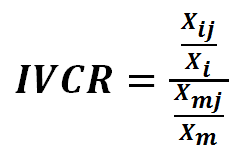

## <font color= green> Exportações dos EUA para a China

In [32]:
# Exportação dos EUA para a China de cada um dos produtos por ano

produto_exportado_ano = exportacoes.pivot_table(columns = 'Year',values = 'Trade Value (US$)', index = 'Commodity')
produto_exportado_ano.reset_index(inplace = True)
produto_exportado_ano

Year,Commodity,2000,2001,2002,2003,2004
0,"Aircraft, spacecraft, and parts thereof",1.691934e+09,2.447933e+09,3.428799e+09,2.430459e+09,1.814809e+09
1,Albuminoidal substances; modified starches; gl...,NaN,NaN,4.522231e+07,7.022837e+07,8.856748e+07
2,"Albuminoids, modified starches, glues, enzymes",2.776458e+07,4.696262e+07,NaN,NaN,NaN
3,Aluminium and articles thereof,3.173815e+08,2.906038e+08,NaN,NaN,NaN
4,Aluminum and articles thereof,NaN,NaN,2.679898e+08,3.452400e+08,5.148685e+08
...,...,...,...,...,...,...
154,"Wool, animal hair, horsehair yarn and fabric t...",3.160863e+06,2.395897e+06,NaN,NaN,NaN
155,"Wool, fine or coarse animal hair; horsehair ya...",NaN,NaN,3.165832e+06,9.281198e+06,6.928161e+06
156,"Works of art, collectors pieces and antiques",1.259684e+07,1.685123e+07,NaN,NaN,NaN
157,"Works of art, collectors' pieces and antiques",NaN,NaN,2.659994e+07,8.804059e+06,1.683307e+07


In [11]:
# Preenchendo os valores faltantes

produto_exportado_ano.fillna(value = 0, inplace = True)

In [12]:
# Valor Total das Exportações para a China por Ano

agrupamento = exportacoes['Trade Value (US$)']

exportacoes_totais = exportacoes.groupby(dados_validos['Year']).sum()
exportacoes_totais = pd.DataFrame(exportacoes_totais['Trade Value (US$)'])
exportacoes_totais.reset_index(inplace = True)

In [13]:
exportacoes_totais

,Year,Trade Value (US$)
0,2000,16184679302
1,2001,19181936062
2,2002,22127509053
3,2003,28367720782
4,2004,34427686531


In [14]:
exportacoes_totais.iloc[0,1]

16184679302

In [15]:
# Criando o coeficiente de exportações para China divindo por exportações Totais

numerador_2000 = produto_exportado_ano[2000]/exportacoes_totais.iloc[0,1]
numerador_2001 = produto_exportado_ano[2001]/exportacoes_totais.iloc[1,1]
numerador_2002 = produto_exportado_ano[2002]/exportacoes_totais.iloc[2,1]
numerador_2003 = produto_exportado_ano[2003]/exportacoes_totais.iloc[3,1]
numerador_2004 = produto_exportado_ano[2004]/exportacoes_totais.iloc[4,1]

## <font color= green> Exportações dos EUA para o Mundo

In [16]:
# Carregando os dados

negociacoes_mundiais = pd.read_csv('comtrade usa-world.csv')

In [17]:
# Selecionando variáveis relevantes

negociacoes_mundiais = negociacoes_mundiais[['Year','Commodity','Trade Value (US$)','Trade Flow']]

In [18]:
# Dividindo o DataSet em Exportações e Importações

importacoes_mundiais = negociacoes_mundiais[negociacoes_mundiais['Trade Flow'] == 'Import']
exportacoes_mundiais = negociacoes_mundiais[negociacoes_mundiais['Trade Flow'] == 'Export']
reexportacoes_mundiais = negociacoes_mundiais[negociacoes_mundiais['Trade Flow'] == 'Re-Export']

In [19]:
# Exportações de produtos dos EUA para o Mundo por ano

produto_exportado_ano_mundial = exportacoes_mundiais.pivot_table(columns = 'Year',values = 'Trade Value (US$)', index = 'Commodity')
produto_exportado_ano_mundial.reset_index(inplace = True)

In [20]:
# Substituindo os NaNs por 0

produto_exportado_ano_mundial.fillna(value= 0, inplace = True)

In [21]:
# Valor Total das Exportações para a China por Ano

exportacoes_mundiais_totais = exportacoes_mundiais.groupby(dados_validos['Year']).sum()
exportacoes_mundiais_totais = pd.DataFrame(exportacoes_mundiais_totais['Trade Value (US$)'])
exportacoes_mundiais_totais.reset_index(inplace = True)

In [22]:
# Criando o coeficiente de exportações mundiais por produtos dividido por exportações mundiais totais

denominador_2000 = produto_exportado_ano_mundial[2000]/exportacoes_mundiais_totais.iloc[0,1]
denominador_2001 = produto_exportado_ano_mundial[2001]/exportacoes_mundiais_totais.iloc[1,1]
denominador_2002 = produto_exportado_ano_mundial[2002]/exportacoes_mundiais_totais.iloc[2,1]
denominador_2003 = produto_exportado_ano_mundial[2003]/exportacoes_mundiais_totais.iloc[3,1]
denominador_2004 = produto_exportado_ano_mundial[2004]/exportacoes_mundiais_totais.iloc[4,1]

### <font color= green> Calculando o IVCR

In [23]:
ivcr_2000 = pd.Series(numerador_2000/denominador_2000)
ivcr_2001 = pd.Series(numerador_2001/denominador_2001)
ivcr_2002 = pd.Series(numerador_2002/denominador_2002)
ivcr_2003 = pd.Series(numerador_2003/denominador_2003)
ivcr_2004 = pd.Series(numerador_2004/denominador_2004)

In [24]:
ivcr_2000_a_2004 = pd.DataFrame({'2000' : ivcr_2000,
                                  '2001':ivcr_2001,
                                 '2002' : ivcr_2002,
                                 '2003' : ivcr_2003,
                                 '2004' : ivcr_2004})

ivcr_2000_a_2004.index = produto_exportado_ano_mundial['Commodity']
ivcr_2000_a_2004.fillna(value = 0, inplace = True)

In [28]:
ivcr_2000_a_2004

,2000,2001,2002,2003,2004
Commodity,,,,,
"Aircraft, spacecraft, and parts thereof",2.061379,2.077163,2.407240,1.535099,0.739930
Albuminoidal substances; modified starches; glues; enzymes,0.000000,0.000000,0.820613,1.214192,1.164499
"Albuminoids, modified starches, glues, enzymes",0.888447,0.979607,0.000000,0.000000,0.000000
Aluminium and articles thereof,2.832125,2.216400,0.000000,0.000000,0.000000
Aluminum and articles thereof,0.000000,0.000000,1.676703,1.781818,1.879574
...,...,...,...,...,...
"Wool, animal hair, horsehair yarn and fabric thereof",1.187196,0.724309,0.000000,0.000000,0.000000
"Wool, fine or coarse animal hair; horsehair yarn and woven fabric",0.000000,0.000000,0.811220,1.967317,1.394358
"Works of art, collectors pieces and antiques",0.184445,0.157049,0.000000,0.000000,0.000000


In [33]:
ivcr_2000_a_2004[ivcr_2000_a_2004['2000'] >= 5]

,2000,2001,2002,2003,2004
Commodity,,,,,
Fertilizers,12.562066,7.099861,9.154823,4.639156,2.370718
"Oil seed, oleagic fruits, grain, seed, fruit, etc, nes",7.650411,5.711526,0.000000,0.000000,0.000000
Raw hides and skins (other than furskins) and leather,5.688239,6.052097,0.000000,0.000000,0.000000
"Vegetable plaiting materials, vegetable products nes",15.485688,6.623052,0.000000,0.000000,0.000000
